# Categorizing and Tagging Words

In [2]:
import nltk
from nltk import word_tokenize
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [3]:
nltk.help.upenn_tagset('RB')

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


In [4]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year moment car world family house child country boy
state job way place girl war work room


In [5]:
#text.similar gives words that appear in the same context, w1 w' w2 , find other words w that appear with w1 w w2
#useful to tag words that we do not know to which category they belong,
#just find a similar word that we knwo the tag to.
text.similar('bought')

made done put said had seen found left given heard got was been
brought set that took in called felt


In [6]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [7]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [8]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

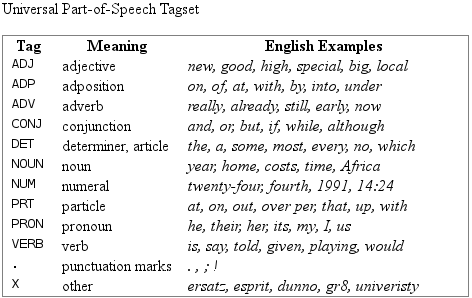

In [9]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news',tagset='universal')
tag_fd = nltk.FreqDist(tag for (word,tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [13]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a,b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
[tag for tag in fdist.most_common()]

[('NOUN', 7959),
 ('DET', 7373),
 ('ADJ', 4761),
 ('ADP', 3781),
 ('.', 2796),
 ('VERB', 1842),
 ('CONJ', 938),
 ('NUM', 894),
 ('ADV', 186),
 ('PRT', 94),
 ('PRON', 19),
 ('X', 11)]

In [14]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt,_) in word_tag_fd.most_common() if wt[1] == 'VERB']

['is',
 'said',
 'was',
 'are',
 'be',
 'has',
 'have',
 'will',
 'says',
 'would',
 'were',
 'had',
 'been',
 'could',
 "'s",
 'can',
 'do',
 'say',
 'make',
 'may',
 'did',
 'rose',
 'made',
 'does',
 'expected',
 'buy',
 'take',
 'get',
 'might',
 'sell',
 'added',
 'help',
 'sold',
 'including',
 'should',
 'reported',
 'according',
 'compared',
 'being',
 'pay',
 'fell',
 'began',
 'based',
 'closed',
 'used',
 'see',
 'want',
 "'re",
 'took',
 'yield',
 'priced',
 'set',
 'offered',
 'noted',
 'approved',
 'come',
 'cut',
 'ended',
 'think',
 'become',
 'found',
 'increased',
 'growing',
 'received',
 'named',
 'declined',
 'go',
 'trying',
 'proposed',
 'put',
 'give',
 'held',
 'came',
 'use',
 'paid',
 'estimated',
 'raise',
 'going',
 'designed',
 'continue',
 'called',
 'making',
 'plans',
 'wo',
 'must',
 'expects',
 'seeking',
 'increasing',
 'saying',
 'gained',
 'trading',
 'acquired',
 'got',
 'fined',
 'owns',
 'became',
 'included',
 'filed',
 'reached',
 'holding',
 

In [15]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [17]:
#reverse order, see likely words for given tag
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
list(cfd2['VBN'])

['served',
 'ratified',
 'burned',
 'Founded',
 'helped',
 'switched',
 'relegated',
 'blocked',
 'bought',
 'talked',
 'posted',
 'raised',
 'postponed',
 'matched',
 'classified',
 'confused',
 'desired',
 'trimmed',
 'inflated',
 'slowed',
 'requested',
 'loaded',
 'contributed',
 'protected',
 'exercised',
 'done',
 'gone',
 'pleased',
 'maintained',
 'stimulated',
 'rigged',
 'disappointed',
 'described',
 'related',
 'attached',
 'printed',
 'respected',
 'reaped',
 'risen',
 'UPHELD',
 'tied',
 'edged',
 'surged',
 'alienated',
 'listed',
 'founded',
 'dumped',
 'added',
 'improved',
 'quoted',
 'split',
 'feared',
 'begun',
 'funded',
 'regulated',
 'expected',
 'polled',
 'pressed',
 'frightened',
 'rated',
 'orchestrated',
 'deemed',
 'surfaced',
 'zoomed',
 'cooled',
 'rescheduled',
 'determined',
 'excited',
 'settled',
 'believed',
 'hurt',
 'entrusted',
 'abandoned',
 'adjusted',
 'killed',
 'installed',
 'born',
 'enacted',
 'renovated',
 'stripped',
 'opposed',
 'paid',

In [18]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [19]:
from nltk.corpus import brown
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)
            
for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

disposed to compromise
served to provide
mean to imply
mean to imply
attempts to face
need to submit
prepared to run
asked to choose
continuing to incur
seems to think
begin to amass
sought to limit
bring to bear
invited to participate
sought to bring
attempting to explore
seen to consist
committed to avoid
claim to serve
determined to avoid
trying to converse
started to adjust
trying to make
decided to take
forced to conclude
beginning to make
helped to make
made to give
determined to exclude
sought to win
sought to avoid
meant to incur
supposed to result
cited to show
supposed to possess
burned to make
wanted to find
helps to meet
rejoiced to see
began to suspect
began to review
called to sit
began to write
decided to try
takes to tell
seemed to widen
proceeded to teach
helps to make
remember to make
supposed to like
working to improve
like to make
added to encourage
like to shear
needs to tell
like to grow
allowed to mature
used to attack
continued to threaten
decide to build
used t

pass to add
demanding to know
seems to threaten
tried to describe
tried to explain
seem to feel
got to play
ceased to need
like to live
came to see
threatens to break
begins to fade
begins to appear
equipped to tell
used to increase
hired to repeat
wished to make
seems to exist
means to choose
struggle to insulate
serves to crystallize
doomed to become
serves to illuminate
failed to furnish
encouraged to trade
continued to come
promised to send
attempted to understand
decided to send
assigned to arrest
planned to build
offered to surrender
gone to live
returned to succeed
expected to arrange
expected to supply
expected to entertain
tried to bring
provoked to use
refused to let
needed to outwit
purporting to inform
inspired to remind
mean to tell
trying to demonstrate
went to visit
continued to teach
beginning to devise
learn to like
stood to watch
planned to go
trying to plan
continues to grow
learn to keep
learned to polish
left to meet
fails to make
resolved to maintain
register to v

desire to explore
required to own
required to attain
decide to support
prepared to depart
designed to provide
designed to raise
designed to prevent
aimed to attract
like to press
take to show
designed to prevent
persuaded to take
induced to establish
persuaded to adopt
persuaded to adopt
prepared to give
prepared to enter
dedicated to secure
like to think
like to think
afford to lose
continues to add
helping to pilot
prefer to speak
go to discuss
made to replace
continuing to seek
seem to add
seem to fix
known to tax
like to see
continued to run
voted to continue
entitled to benefit
needed to establish
designed to give
remain to preserve
gathered to thank
continue to protect
amended to read
construed to alter
required to correlate
amended to read
directed to make
directed to establish
continued to display
required to move
planned to furnish
agreed to submit
initiated to resolve
found to exist
taken to isolate
modified to reduce
tending to separate
established to gather
used to study
us

appeared to evoke
tend to blunt
try to build
tend to become
presume to lecture
attempting to acquaint
failed to state
like to make
presume to speak
mean to live
made to look
designed to discover
seems to use
used to describe
postulated to explain
used to support
seem to corroborate
wants to hear
comes to represent
used to accompany
seems to symbolize
begins to appear
begins to ramble
help to set
calculated to put
decided to write
seemed to open
combine to create
learned to use
began to take
wanted to tell
wanted to substitute
want to make
come to determine
begun to ebb
intended to incorporate
led to postulate
hope to discover
tended to emphasize
fails to explore
seeks to make
helping to define
trying to avoid
trying to get
made to symbolize
kneels to kiss
serve to travesty
used to equate
altered to show
altered to show
taken to branch
attempt to execute
used to name
used to name
used to generate
used to select
used to select
used to specify
used to specify
expected to serve
used to eli

promised to pay
planning to remarry
determined to get
seemed to swell
surprised to meet
trying to tell
known to run
seem to preserve
got to understand
got to know
came to ask
asked to see
began to abuse
hurry to hang
seemed to mind
started to cross
started to curse
offering to buy
began to feel
seem to wink
continued to stare
beginning to feel
like to listen
want to study
relieved to see
seemed to notice
decided to stay
startled to see
began to feel
bothered to ask
beginning to take
began to wish
want to encourage
began to talk
paused to moisten
went to join
got to go
trying to get
want to know
want to take
want to leave
got to assume
got to keep
burning to light
decided to leave
set to stay
going to kill
go to bat
stopped to cherish
struggling to bridge
learning to think
delighted to encounter
wanted to explain
taught to grow
Taught to grow
opened to sell
required to assume
want to make
got to hold
want to inquire
seemed to spend
preoccupied to cook
asked to speak
pacing to stare
wish

In [20]:
#words that are highly ambiguous
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                for (word, tag) in brown_news_tagged)
for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

best ADJ ADV NOUN VERB
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


In [21]:
#python dictionaries
pos = {}
pos['ideas'] = 'N'
pos

{'ideas': 'N'}

In [22]:
pos['ideas']

'N'

In [23]:
list(pos)

['ideas']

In [24]:
for word in sorted(pos):
    print(word+":",pos[word])

ideas: N


In [25]:
list(pos.keys())

['ideas']

In [26]:
list(pos.values())

['N']

In [27]:
list(pos.items())

[('ideas', 'N')]

In [28]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos = dict(colorless='ADJ', ideas='N', sleep='V', furiously='ADV')

In [29]:
#to create dictionaries with default values for keys not added yet
from collections import defaultdict
frequency = defaultdict(int)
frequency['colorless'] = 4
frequency['ideas']

0

In [30]:
frequency['colorless']

4

In [31]:
pos = defaultdict(lambda: 'NOUN')
pos['colorless'] = 'ADJ'
pos['blog']

'NOUN'

In [32]:
#map most common words to themselves, everything else to UNK
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = [word for (word, _) in vocab.most_common(1000)]
mapping = defaultdict(lambda: 'UNK')
for v in v1000:
    mapping[v] = v
alice2 = [mapping[v] for v in alice]
alice2[:100]


['UNK',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'UNK',
 'by',
 'UNK',
 'UNK',
 'UNK',
 'UNK',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit',
 '-',
 'UNK',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'UNK',
 ',',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 ':',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'UNK',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'UNK',
 ',',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'UNK',
 'in',
 'it',
 ',',
 "'",
 'and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 ",'",
 'thought',
 'Alice',
 "'",
 'without',
 'pictures',
 'or',
 'conversation',
 "?'",
 'So',
 'she',
 'was',
 'UNK',
 'in',
 'her',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'as',
 'she',
 'could',
 ',']

In [35]:
anagrams = defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

In [37]:
# nltk way to create defaultdict(list)
anagrams = nltk.Index((''.join(sorted(w)),w) for w in words)
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

In [38]:
#inverting dictionaries
#no repetitions on the values
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos2 = dict((value, key) for (key, value) in pos.items())
pos2['N']

'ideas'

In [39]:
#with repetitions
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})
pos2 = defaultdict(list)
for key, value in pos.items():
    pos2[value].append(key)
pos2['ADV']

['furiously', 'peacefully']

In [40]:
pos2 = nltk.Index((value, key) for (key, value) in pos.items())
pos2['ADV']

['furiously', 'peacefully']

## Automatic tagging

In [41]:
#tag all words to the most frequent tag, baseline
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [42]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [43]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

In [44]:
#regex tagger
patterns = [
     (r'.*ing$', 'VBG'),               # gerunds
     (r'.*ed$', 'VBD'),                # simple past
     (r'.*es$', 'VBZ'),                # 3rd singular present
     (r'.*ould$', 'MD'),               # modals
     (r'.*\'s$', 'NN$'),               # possessive nouns
     (r'.*s$', 'NNS'),                 # plural nouns
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN')                     # nouns (default)
 ]
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [45]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

In [46]:
#the most frequent words do not have NN tag, find most frequent words and store most likely tag
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [47]:
sent = brown.sents(categories='news')[3]
baseline_tagger.tag(sent)
#many words with tag None because they are not most frequent 100 words

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

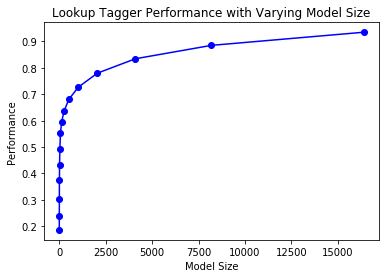

In [48]:
#in the cases the tagger doesn't tag the word activate the default tagger to NN
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                     backoff=nltk.DefaultTagger('NN'))
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()
    
display()   

## N-Gram Tagging

In [49]:
#train tagger
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)##training data
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [50]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

In [51]:
#separate train and test data
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8127180304993521

In [52]:
#ngram tagger is a generalization of a unigram tagger whose context is the current word 
#together with the part of speech tags of the n-1 preciding tokens.
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [53]:
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [54]:
bigram_tagger.evaluate(test_sents)

0.10226253363899133

In [55]:
#combine taggers
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8459085019435861

In [56]:
#storing taggers
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

In [57]:
from pickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

In [58]:
text = """The board's action shows what free enterprise
     is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]

In [ ]:
# Categorizing and Tagging Words

import nltk
from nltk import word_tokenize
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

nltk.help.upenn_tagset('RB')

text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

#text.similar gives words that appear in the same context, w1 w' w2 , find other words w that appear with w1 w w2
#useful to tag words that we do not know to which category they belong,
#just find a similar word that we knwo the tag to.
text.similar('bought')

tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

nltk.corpus.brown.tagged_words()

nltk.corpus.brown.tagged_words(tagset='universal')

![Screenshot%20from%202017-10-28%2014-08-57%20-%201.png](attachment:Screenshot%20from%202017-10-28%2014-08-57%20-%201.png)

from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news',tagset='universal')
tag_fd = nltk.FreqDist(tag for (word,tag) in brown_news_tagged)
tag_fd.most_common()

word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a,b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
[tag for tag in fdist.most_common()]

wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt,_) in word_tag_fd.most_common() if wt[1] == 'VERB']

cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

#reverse order, see likely words for given tag
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
list(cfd2['VBN'])

brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

from nltk.corpus import brown
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)
            
for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

#words that are highly ambiguous
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                for (word, tag) in brown_news_tagged)
for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

#python dictionaries
pos = {}
pos['ideas'] = 'N'
pos

pos['ideas']

list(pos)

for word in sorted(pos):
    print(word+":",pos[word])

list(pos.keys())

list(pos.values())

list(pos.items())

pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos = dict(colorless='ADJ', ideas='N', sleep='V', furiously='ADV')

#to create dictionaries with default values for keys not added yet
from collections import defaultdict
frequency = defaultdict(int)
frequency['colorless'] = 4
frequency['ideas']

frequency['colorless']

pos = defaultdict(lambda: 'NOUN')
pos['colorless'] = 'ADJ'
pos['blog']

#map most common words to themselves, everything else to UNK
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = [word for (word, _) in vocab.most_common(1000)]
mapping = defaultdict(lambda: 'UNK')
for v in v1000:
    mapping[v] = v
alice2 = [mapping[v] for v in alice]
alice2[:100]


anagrams = defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)
anagrams['aeilnrt']

# nltk way to create defaultdict(list)
anagrams = nltk.Index((''.join(sorted(w)),w) for w in words)
anagrams['aeilnrt']

#inverting dictionaries
#no repetitions on the values
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos2 = dict((value, key) for (key, value) in pos.items())
pos2['N']

#with repetitions
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})
pos2 = defaultdict(list)
for key, value in pos.items():
    pos2[value].append(key)
pos2['ADV']

pos2 = nltk.Index((value, key) for (key, value) in pos.items())
pos2['ADV']

## Automatic tagging

#tag all words to the most frequent tag, baseline
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

default_tagger.evaluate(brown_tagged_sents)

#regex tagger
patterns = [
     (r'.*ing$', 'VBG'),               # gerunds
     (r'.*ed$', 'VBD'),                # simple past
     (r'.*es$', 'VBZ'),                # 3rd singular present
     (r'.*ould$', 'MD'),               # modals
     (r'.*\'s$', 'NN$'),               # possessive nouns
     (r'.*s$', 'NNS'),                 # plural nouns
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN')                     # nouns (default)
 ]
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

regexp_tagger.evaluate(brown_tagged_sents)

#the most frequent words do not have NN tag, find most frequent words and store most likely tag
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

sent = brown.sents(categories='news')[3]
baseline_tagger.tag(sent)
#many words with tag None because they are not most frequent 100 words

#in the cases the tagger doesn't tag the word activate the default tagger to NN
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                     backoff=nltk.DefaultTagger('NN'))
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()
    
display()   

## N-Gram Tagging

#train tagger
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)##training data
unigram_tagger.tag(brown_sents[2007])

unigram_tagger.evaluate(brown_tagged_sents)

#separate train and test data
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

#ngram tagger is a generalization of a unigram tagger whose context is the current word 
#together with the part of speech tags of the n-1 preciding tokens.
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

bigram_tagger.evaluate(test_sents)

#combine taggers
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

#storing taggers
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

from pickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

text = """The board's action shows what free enterprise
     is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)